In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def generate_synthetic_data():
    print("Generating synthetic energy data...")
    # Create date range for 6 months: Jan 2023 to June 2023
    date_rng = pd.date_range(start='1/1/2023', end='6/30/2023', freq='H')
    
    # Create DataFrame
    df = pd.DataFrame(date_rng, columns=['timestamp'])
    
    # Simulate device power consumption (Watts)
    
    # 1. Fridge: Cyclic pattern (Compressor On/Off) + Base load
    # Randomly switching between low (idle) and high (cooling) states
    df['fridge'] = np.random.randint(50, 200, size=(len(date_rng))) * np.random.choice([0, 1], size=len(date_rng), p=[0.3, 0.7])
    
    # 2. AC: Higher in summer (April-June), lower in winter (Jan-March)
    month = df['timestamp'].dt.month
    # Higher probability of AC being ON in months 4, 5, 6
    ac_prob = np.where(month >= 4, 0.8, 0.1) 
    df['ac'] = np.random.randint(1000, 2500, size=(len(date_rng))) * np.random.binomial(1, ac_prob)
    
    # 3. Lights: Higher usage at night (18:00 - 06:00)
    hour = df['timestamp'].dt.hour
    light_prob = np.where((hour >= 18) | (hour <= 6), 0.9, 0.1)
    df['lights'] = np.random.randint(20, 100, size=(len(date_rng))) * np.random.binomial(1, light_prob)
    
    # 4. Microwave: Random usage spikes
    df['microwave'] = np.random.randint(800, 1200, size=(len(date_rng))) * np.random.choice([0, 1], size=len(date_rng), p=[0.95, 0.05])
    
    # Total power consumption
    df['total_power'] = df['fridge'] + df['ac'] + df['lights'] + df['microwave']
    
    # Introduce some random missing values to practice cleaning
    # Set 0.5% of total_power to NaN
    mask = np.random.choice([True, False], size=len(df), p=[0.005, 0.995])
    df.loc[mask, 'total_power'] = np.nan
    
    return df

# Generate and save
df_raw = generate_synthetic_data()
print("Data Generated. Shape:", df_raw.shape)
df_raw.to_csv()

Generating synthetic energy data...
Data Generated. Shape: (4321, 6)


C:\Users\louis\AppData\Local\Temp\ipykernel_22932\3494028903.py:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_rng = pd.date_range(start='1/1/2023', end='6/30/2023', freq='H')


',timestamp,fridge,ac,lights,microwave,total_power\r\n0,2023-01-01 00:00:00,73,0,55,0,128.0\r\n1,2023-01-01 01:00:00,142,1769,84,0,1995.0\r\n2,2023-01-01 02:00:00,0,0,21,0,21.0\r\n3,2023-01-01 03:00:00,0,0,64,0,64.0\r\n4,2023-01-01 04:00:00,0,0,41,0,41.0\r\n5,2023-01-01 05:00:00,0,0,50,0,50.0\r\n6,2023-01-01 06:00:00,110,2097,99,0,2306.0\r\n7,2023-01-01 07:00:00,61,0,0,0,61.0\r\n8,2023-01-01 08:00:00,0,0,0,0,0.0\r\n9,2023-01-01 09:00:00,167,0,0,0,167.0\r\n10,2023-01-01 10:00:00,53,0,0,0,53.0\r\n11,2023-01-01 11:00:00,168,0,0,0,168.0\r\n12,2023-01-01 12:00:00,0,1909,76,849,2834.0\r\n13,2023-01-01 13:00:00,137,0,0,0,137.0\r\n14,2023-01-01 14:00:00,144,0,0,0,144.0\r\n15,2023-01-01 15:00:00,0,0,0,0,0.0\r\n16,2023-01-01 16:00:00,0,0,67,0,67.0\r\n17,2023-01-01 17:00:00,178,0,0,0,178.0\r\n18,2023-01-01 18:00:00,55,0,58,0,113.0\r\n19,2023-01-01 19:00:00,0,0,89,0,89.0\r\n20,2023-01-01 20:00:00,52,0,92,0,144.0\r\n21,2023-01-01 21:00:00,68,1408,26,0,1502.0\r\n22,2023-01-01 22:00:00,0,0,61,0,61.0\

In [2]:
df_raw.to_csv("Synthetic-Data",index=True)
df_raw.iloc[:30]
df_raw

,timestamp,fridge,ac,lights,microwave,total_power
0,2023-01-01 00:00:00,73,0,55,0,128.0
1,2023-01-01 01:00:00,142,1769,84,0,1995.0
2,2023-01-01 02:00:00,0,0,21,0,21.0
3,2023-01-01 03:00:00,0,0,64,0,64.0
4,2023-01-01 04:00:00,0,0,41,0,41.0
...,...,...,...,...,...,...
4316,2023-06-29 20:00:00,182,2089,92,0,2363.0
4317,2023-06-29 21:00:00,121,1748,77,0,1946.0
4318,2023-06-29 22:00:00,171,2270,88,1172,3701.0
4319,2023-06-29 23:00:00,0,1228,46,0,1274.0


In [3]:
missing = df_raw.isnull().sum()
print("Missing Values per column:\n", missing)

Missing Values per column:
 timestamp       0
fridge          0
ac              0
lights          0
microwave       0
total_power    20
dtype: int64


In [4]:
df_clean = df_raw.fillna(method='ffill')
df_clean.to_csv("Clean-Data",index = False)

C:\Users\louis\AppData\Local\Temp\ipykernel_22932\332814519.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_clean = df_raw.fillna(method='ffill')


In [5]:
missing_value = df_clean.isnull().sum()
print("Missing Values per column:\n", missing_value)

Missing Values per column:
 timestamp      0
fridge         0
ac             0
lights         0
microwave      0
total_power    0
dtype: int64


In [6]:
df = df_clean.copy()

In [7]:
df['timestamp'] =  pd.to_datetime(df['timestamp'])
df['timestamp']

0      2023-01-01 00:00:00
1      2023-01-01 01:00:00
2      2023-01-01 02:00:00
3      2023-01-01 03:00:00
4      2023-01-01 04:00:00
               ...        
4316   2023-06-29 20:00:00
4317   2023-06-29 21:00:00
4318   2023-06-29 22:00:00
4319   2023-06-29 23:00:00
4320   2023-06-30 00:00:00
Name: timestamp, Length: 4321, dtype: datetime64[ns]

In [8]:
df.set_index('timestamp',inplace=True)

In [9]:
df_daily = df.resample('D').mean()
df_daily.to_csv('timed-data',index=True)
df_daily.head()

,fridge,ac,lights,microwave,total_power
timestamp,,,,,
2023-01-01,58.666667,355.583333,40.875000,35.375000,490.500000
2023-01-02,76.958333,74.333333,28.416667,114.208333,293.916667
2023-01-03,92.083333,412.541667,33.791667,42.291667,580.708333
2023-01-04,104.041667,83.583333,34.500000,41.083333,263.208333
2023-01-05,84.791667,0.000000,25.875000,0.000000,110.666667


In [17]:
df_weekly_sum = df.resample('W').mean()

df_weekly_sum

,fridge,ac,lights,microwave,total_power
timestamp,,,,,
2023-01-01,58.666667,355.583333,40.875000,35.375000,490.500000
2023-01-08,87.607143,150.702381,31.202381,39.827381,310.613095
2023-01-15,76.845238,171.476190,31.494048,38.440476,317.892857
2023-01-22,86.773810,254.934524,31.892857,44.422619,418.023810
2023-01-29,81.791667,201.535714,30.440476,53.672619,367.440476
2023-02-05,91.363095,139.458333,31.952381,78.839286,341.613095
2023-02-12,94.601190,147.994048,31.202381,58.511905,331.803571
2023-02-19,95.904762,151.380952,35.738095,16.732143,300.178571
2023-02-26,83.630952,168.726190,31.678571,40.922619,314.125000


In [18]:
df_weekly_kWh = df_weekly_sum/ 1000

<Figure size 1200x500 with 0 Axes>

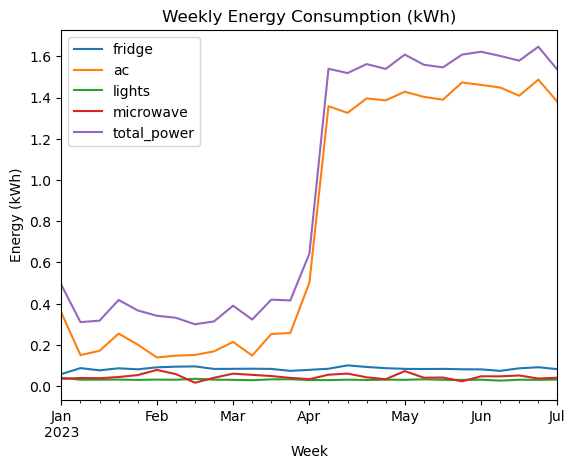

In [19]:
plt.figure(figsize=(12,5))
df_weekly_kWh.plot()
plt.title("Weekly Energy Consumption (kWh)")
plt.ylabel("Energy (kWh)")
plt.xlabel("Week")
plt.show()

In [20]:
df_monthly = df.resample('M').mean()
df_monthly

C:\Users\louis\AppData\Local\Temp\ipykernel_22932\3087980921.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M').mean()


,fridge,ac,lights,microwave,total_power
timestamp,,,,,
2023-01-31,82.692204,198.645161,31.477151,48.115591,361.135753
2023-02-28,91.470238,162.505952,32.970238,44.001488,328.218750
2023-03-31,81.069892,193.497312,31.182796,51.095430,360.702957
2023-04-30,90.495833,1374.933333,30.376389,45.087500,1543.212500
2023-05-31,83.704301,1422.463710,31.303763,45.610215,1580.788978
2023-06-30,82.964132,1445.499283,30.223816,44.829268,1604.572453


In [21]:
df_monthly_kWh = df_monthly / 1000

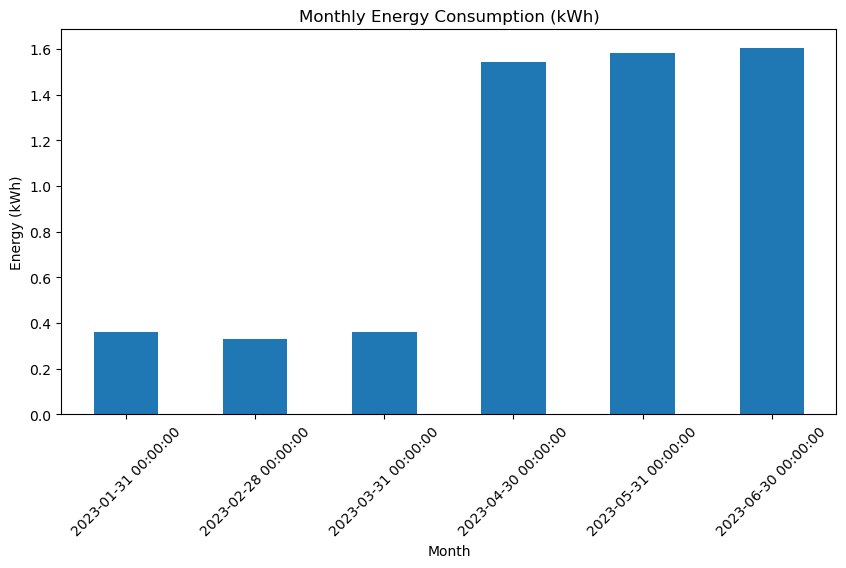

In [22]:
plt.figure(figsize=(10,5))
df_monthly_kWh['total_power'].plot(kind='bar')

plt.title("Monthly Energy Consumption (kWh)")
plt.xlabel("Month")
plt.ylabel("Energy (kWh)")
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x600 with 0 Axes>

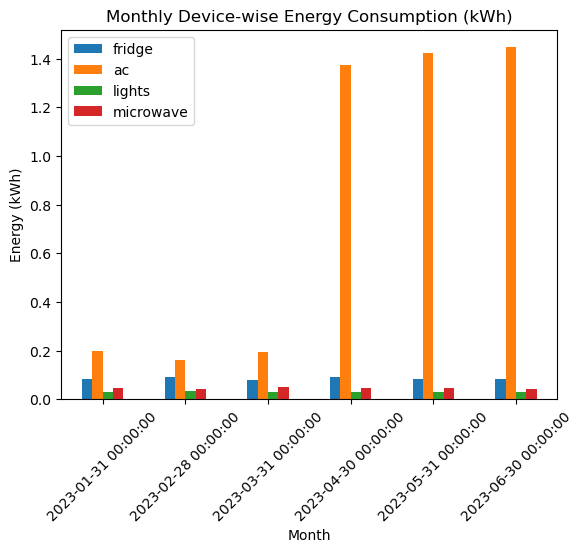

In [23]:
plt.figure(figsize=(12,6))
df_monthly_kWh[['fridge','ac','lights','microwave']].plot(kind='bar')

plt.title("Monthly Device-wise Energy Consumption (kWh)")
plt.xlabel("Month")
plt.ylabel("Energy (kWh)")
plt.xticks(rotation=45)
plt.show()

In [24]:
df_hourly = df.resample('H').mean()
df_hourly

C:\Users\louis\AppData\Local\Temp\ipykernel_22932\1016987315.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = df.resample('H').mean()


,fridge,ac,lights,microwave,total_power
timestamp,,,,,
2023-01-01 00:00:00,73.0,0.0,55.0,0.0,128.0
2023-01-01 01:00:00,142.0,1769.0,84.0,0.0,1995.0
2023-01-01 02:00:00,0.0,0.0,21.0,0.0,21.0
2023-01-01 03:00:00,0.0,0.0,64.0,0.0,64.0
2023-01-01 04:00:00,0.0,0.0,41.0,0.0,41.0
...,...,...,...,...,...
2023-06-29 20:00:00,182.0,2089.0,92.0,0.0,2363.0
2023-06-29 21:00:00,121.0,1748.0,77.0,0.0,1946.0
2023-06-29 22:00:00,171.0,2270.0,88.0,1172.0,3701.0


C:\Users\louis\AppData\Local\Temp\ipykernel_22932\3351658543.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly_devices = df[['fridge','ac','lights','microwave']].resample('H').sum()


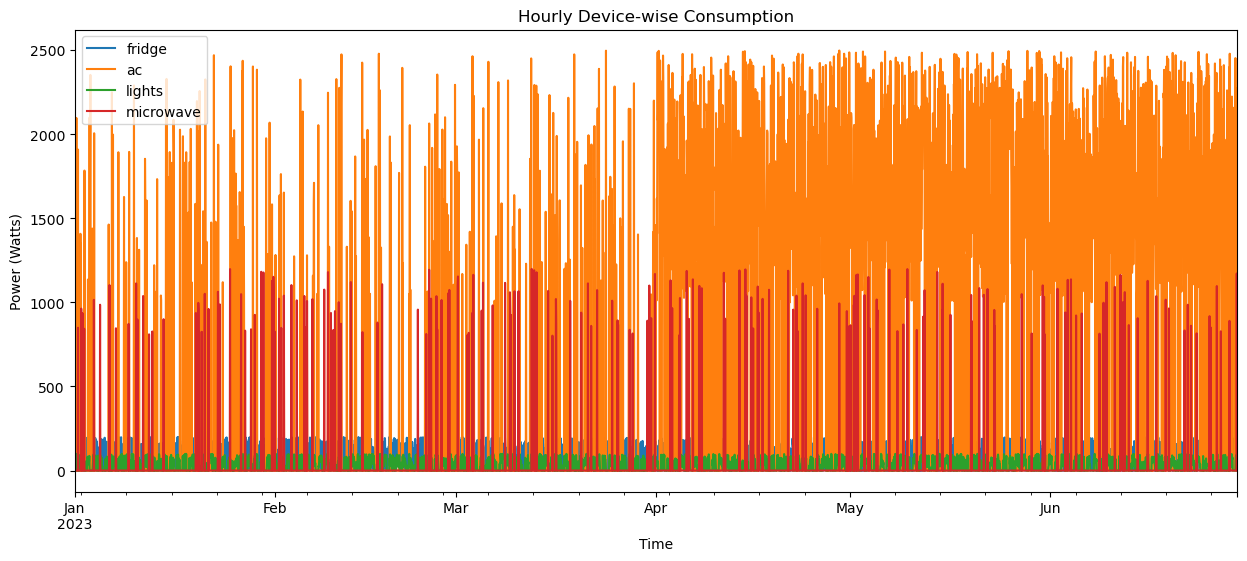

In [31]:
df_hourly_devices = df[['fridge','ac','lights','microwave']].resample('H').sum()

df_hourly_devices.plot(figsize=(15,6))
plt.title("Hourly Device-wise Consumption")
plt.xlabel("Time")
plt.ylabel("Power (Watts)")
plt.show()
